In [7]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

# Correct URL for the specific API endpoint
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'

parameters = {
  'start': '1',
  'limit': '20',
  'convert': 'INR'
}

headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'e0a2ab7c-6b30-4677-892c-3e393497e308',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  response.raise_for_status()  # Raise an error for bad status codes
  data = json.loads(response.text)
    
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(f"Network error: {e}")
except json.JSONDecodeError as e:
  print(f"JSON decoding error: {e}")
except Exception as e:
  print(f"An error occurred: {e}")

{'status': {'timestamp': '2025-03-01T12:10:58.329Z', 'error_code': 0, 'error_message': None, 'elapsed': 61, 'credit_count': 1, 'notice': None, 'total_count': 10835}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11962, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [11]:
#This allows you to see all the columns
import pandas as pd
pd.set_option("display.max_columns",None)

In [29]:
#This normalizes the data and makes it all pretty in a dataframe
df=pd.json_normalize(data,["data"])
df['timestamp']=pd.to_datetime("now")
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.INR.price,quote.INR.volume_24h,quote.INR.volume_change_24h,quote.INR.percent_change_1h,quote.INR.percent_change_24h,quote.INR.percent_change_7d,quote.INR.percent_change_30d,quote.INR.percent_change_60d,quote.INR.percent_change_90d,quote.INR.market_cap,quote.INR.market_cap_dominance,quote.INR.fully_diluted_market_cap,quote.INR.tvl,quote.INR.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11956,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.982715e+07,1.982715e+07,False,NaN,1,NaN,NaN,None,2025-02-21T08:13:00.000Z,8.514317e+06,2.685844e+12,10.5096,-0.260571,1.389387,1.419017,-6.458379,2.953409,-0.376129,1.688147e+14,60.1415,1.788007e+14,None,2025-02-21T08:14:05.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-21 13:45:15.163985
1,1027,Ethereum,ETH,ethereum,9945,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.205640e+08,1.205640e+08,True,NaN,2,NaN,NaN,None,2025-02-21T08:13:00.000Z,2.390602e+05,1.312831e+12,0.0413,-0.217293,0.855791,2.191520,-16.229358,-16.549077,-17.553711,2.882206e+13,10.2681,2.882206e+13,None,2025-02-21T08:14:05.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-21 13:45:15.163985
2,52,XRP,XRP,xrp,1540,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.788781e+10,9.998642e+10,False,NaN,3,NaN,NaN,None,2025-02-21T08:14:00.000Z,2.308803e+02,3.231180e+11,-31.1332,-0.195002,-0.958315,1.786243,-15.796321,21.947479,71.953954,1.336515e+13,4.7614,2.308803e+13,None,2025-02-21T08:14:05.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-21 13:45:15.163985
3,825,Tether USDt,USDT,tether,117566,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,1.422144e+11,1.445668e+11,True,NaN,4,NaN,NaN,None,2025-02-21T08:13:00.000Z,8.670115e+01,6.225524e+12,8.3060,-0.012517,0.021890,0.002080,0.010199,0.110578,-0.091770,1.233015e+13,4.3927,1.253411e+13,None,2025-02-21T08:14:05.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-02-21 13:45:15.163985
4,1839,BNB,BNB,bnb,2372,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.424768e+08,1.424768e+08,False,NaN,5,NaN,NaN,None,2025-02-21T08:14:00.000Z,5.690926e+04,1.397582e+11,-13.8547,0.422748,1.274973,-1.687168,-5.861718,-1.178367,-2.093212,8.108249e+12,2.9142,8.108249e+12,None,2025-02-21T08:14:05.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-21 13:45:15.163985
5,5426,Solana,SOL,solana,841,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.886122e+08,5.945308e+08,True,NaN,6,NaN,NaN,None,2025-02-21T08:14:00.000Z,1.532279e+04,2.937024e+11,-3.6060,0.527023,2.979614,-10.109468,-30.881586,-3.208909,-31.513604,7.486903e+12,2.6672,9.109871e+12,None,2025-02-21T08:14:05.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-21 13:45:15.163985
6,3408,USDC,USDC,usd-coin,25869,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.621532e+10,5.621532e+10,False,NaN,7,NaN,NaN,None,2025-02-21T08:13:00.000Z,8.668246e+01,6.255946e+11,11.5645,-0.013598,0.002895,-0.003303,-0.013969,-0.008782,0.002496,4.872882e+12,1.7360,4.872882e+12,None,2025-02-21T08:14:05.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-02-21 13:45:15.163985
7,74,Dogecoin,DOGE,dogecoin,1168,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.481354e+11,1.481354e+11,True,NaN,8,NaN,NaN,None,2025-02-21T08:13:00.000Z,2.198370e+01,9.777655e+10,12.8891,-0.184737,-0.328618,-4.613610,-30.336282,-19.020193,-44.737077,3.256564e+12,1.1602,3.256564e+12,None,2025-02-21T08:14:05.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-21 13:45:15.163985
8,2010,Cardano,ADA,cardano,1465,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart

In [13]:
df = pd.DataFrame()  # Creating an empty DataFrame to store API results

def api_runner():
    global df  # Using the global DataFrame to store data across multiple API calls

    # Correct URL for the CoinMarketCap API endpoint to fetch the latest cryptocurrency listings
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'

    parameters = {
        'start': '1',   # Start from the first cryptocurrency
        'limit': '10',   # Fetch data for the top 10 cryptocurrencies
        'convert': 'INR' # Convert prices to Indian Rupees (INR)
    }

    headers = {
        'Accepts': 'application/json',  # API response format
        'X-CMC_PRO_API_KEY': 'e0a2ab7c-6b30-4677-892c-3e393497e308',  # API key for authentication (keep this secure!)
    }

    session = Session()  # Creating a session to handle API requests
    session.headers.update(headers)  # Updating session headers with API key

    try:
        response = session.get(url, params=parameters)  # Sending GET request to API
        response.raise_for_status()  # Raise an error if the response contains a bad status code
        data = json.loads(response.text)  # Convert the response to JSON format

    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(f"Network error: {e}")  # Handling network-related errors
    except json.JSONDecodeError as e:
        print(f"JSON decoding error: {e}")  # Handling errors in JSON response
    except Exception as e:
        print(f"An error occurred: {e}")  # Handling any other unexpected errors

    df2 = pd.json_normalize(data, ["data"])  # Normalizing JSON response into a DataFrame
    df2['timestamp'] = pd.to_datetime("now")  # Adding a timestamp column to track when data was pulled
    df = pd.concat([df, df2], ignore_index=True)  # Appending new data to the existing DataFrame

    # Define file path for saving the data
    file_path = r"C:\Users\joshu\OneDrive\Documents\file\Crypto Project\Api.csv"

    # Check if the CSV file exists; if not, create it with headers
    if not os.path.isfile(file_path):
        df.to_csv(file_path, header='column_names')
    else:
        df.to_csv(file_path, mode='a', header=False)  # Append data without headers if file exists


In [143]:
#This code sets the timer for each loop
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print("Api Runner loop Completed for Today")
    sleep(10)#sleep for i minute
exit()

Api Runner loop Completed for Today
Api Runner loop Completed for Today
Api Runner loop Completed for Today
Api Runner loop Completed for Today


KeyboardInterrupt: 

In [135]:
df33=pd.read_csv(r"C:\Users\joshu\OneDrive\Documents\file\Crypto Project\Api.csv")
df33


,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.INR.price,quote.INR.volume_24h,quote.INR.volume_change_24h,quote.INR.percent_change_1h,quote.INR.percent_change_24h,quote.INR.percent_change_7d,quote.INR.percent_change_30d,quote.INR.percent_change_60d,quote.INR.percent_change_90d,quote.INR.market_cap,quote.INR.market_cap_dominance,quote.INR.fully_diluted_market_cap,quote.INR.tvl,quote.INR.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11957,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.000000,19827534.000000,19827534.000000,False,NaN,1,NaN,NaN,NaN,2025-02-22T06:35:00.000Z,8355625.991481,4250361309940.743164,60.129300,-0.050681,-2.024063,-1.173276,-6.098284,2.315722,-1.956048,165671458437382.531250,60.220000,175468145821110.906250,NaN,2025-02-22T06:36:03.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-22 12:07:14.090659
1,1,1027,Ethereum,ETH,ethereum,9947,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120566328.150759,120566328.150759,True,NaN,2,NaN,NaN,NaN,2025-02-22T06:35:00.000Z,233025.321134,2851452349190.325684,140.808900,0.210887,-2.489668,-0.907284,-16.420186,-21.124076,-21.274966,28095007335228.742188,10.212300,28095007335228.902344,NaN,2025-02-22T06:36:03.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-22 12:07:14.090659
2,2,52,XRP,XRP,xrp,1541,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.000000,57887806032.000000,99986418374.000000,False,NaN,3,NaN,NaN,NaN,2025-02-22T06:35:00.000Z,223.734006,505686633043.857910,50.923200,0.108602,-2.727534,-7.248323,-17.752929,14.903448,78.048300,12951470768940.203125,4.707700,22373400646382.289062,NaN,2025-02-22T06:36:03.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-22 12:07:14.090659
3,3,825,Tether USDt,USDT,tether,117648,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'eth...",NaN,142489546124.827209,144566824343.615417,True,NaN,4,NaN,NaN,NaN,2025-02-22T06:35:00.000Z,86.634745,9428897551335.703125,53.586100,-0.019708,-0.037299,-0.042100,0.047058,0.120177,-0.114021,12344545427297.410156,4.487100,12524509895108.562500,NaN,2025-02-22T06:36:03.000Z,1027.000000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-02-22 12:07:14.090659
4,4,1839,BNB,BNB,bnb,2372,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,142476708.960000,142476708.960000,False,NaN,5,NaN,NaN,NaN,2025-02-22T06:35:00.000Z,56888.805518,172573600470.977692,24.853700,-0.283120,0.641081,-0.588085,-4.385367,-5.050854,-1.393746,8105329786904.368164,2.946300,8105329786904.381836,NaN,2025-02-22T06:36:03.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-22 12:07:14.090659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,35,5426,Solana,SOL,solana,841,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,488731136.693775,594682977.573599,True,NaN,6,NaN,NaN,NaN,2025-02-22T06:54:00.000Z,14809.108706,396483965069.906555,37.773200,-0.649832,-2.746197,-12.746019,-31.046478,-10.303110,-33.271195,7237672531067.191406,2.650600,8806724860205.814453,NaN,2025-02-22T06:54:03.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-22 12:26:09.716807
126,36,3408,USDC,USDC,usd-coin,25894,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,57192977180.937737,57192977180.937737,False,NaN,7,NaN,NaN,NaN,2025-02-22T06:54:00.000Z,86.602249,932818434334.992798,48.908400,-0.001137,0.012132,0.002591,0.002216,-0.031659,0.016217,4953040430946.797852,1.815100,4953040430946.602539,NaN,2025-02-22T06:54:03.000Z,1027.000000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-02-22 12:26:09.716807
127,37,74,Dogecoin,DOGE,d

In [145]:
pd.set_option('display.float_format',lambda x:'%5f'%x)


In [147]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.INR.price,quote.INR.volume_24h,quote.INR.volume_change_24h,quote.INR.percent_change_1h,quote.INR.percent_change_24h,quote.INR.percent_change_7d,quote.INR.percent_change_30d,quote.INR.percent_change_60d,quote.INR.percent_change_90d,quote.INR.market_cap,quote.INR.market_cap_dominance,quote.INR.fully_diluted_market_cap,quote.INR.tvl,quote.INR.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11957,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.000000,19827546.000000,19827546.000000,False,NaN,1,None,None,None,2025-02-22T07:21:00.000Z,8355802.428961,4248095175886.662598,60.187500,0.014326,-2.045548,-0.951316,-5.761343,2.697199,-1.941143,165675057027132.656250,60.235700,175471851008177.500000,None,2025-02-22T07:20:03.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-22 12:52:15.491576
1,1027,Ethereum,ETH,ethereum,9947,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120566328.150759,120566328.150759,True,NaN,2,None,None,None,2025-02-22T07:20:00.000Z,233263.368263,2854988355485.116211,118.389700,0.187459,-2.490288,-0.097865,-16.177312,-20.741050,-21.270454,28123707803536.859375,10.301600,28123707803536.445312,None,2025-02-22T07:20:03.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-22 12:52:15.491576
2,52,XRP,XRP,xrp,1541,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.000000,57887806032.000000,99986418374.000000,False,NaN,3,None,None,None,2025-02-22T07:21:00.000Z,224.321499,503185035226.962585,53.335700,0.360588,-2.816857,-5.849231,-16.943598,15.672011,76.191893,12985479397772.861328,4.753300,22432149856559.382812,None,2025-02-22T07:20:03.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-22 12:52:15.491576
3,825,Tether USDt,USDT,tether,117648,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,142489546124.827209,144566824343.615417,True,NaN,4,None,None,None,2025-02-22T07:21:00.000Z,86.592375,9398701945011.097656,51.860000,0.003162,-0.038352,-0.029058,0.043185,0.147586,-0.115925,12338508226577.828125,4.486000,12518384681296.267578,None,2025-02-22T07:20:03.000Z,1027.000000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-02-22 12:52:15.491576
4,1839,BNB,BNB,bnb,2372,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,142476705.830000,142476705.830000,False,NaN,5,None,None,None,2025-02-22T07:21:00.000Z,56870.498700,172234426594.343536,24.458000,0.070428,0.490318,0.055862,-4.271555,-4.921799,-1.594043,8102721313659.525391,2.968000,8102721313659.850586,None,2025-02-22T07:20:03.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-22 12:52:15.491576
5,5426,Solana,SOL,solana,841,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,488731117.984587,594682958.864412,True,NaN,6,None,None,None,2025-02-22T07:21:00.000Z,14944.606140,397838759591.543152,38.033600,0.456435,-1.761793,-11.705060,-30.573073,-9.413873,-32.614191,7303894066440.249023,2.675400,8887302598153.150391,None,2025-02-22T07:20:03.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-22 12:52:15.491576
6,3408,USDC,USDC,usd-coin,25894,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,57194028510.254700,57194028510.254700,False,NaN,7,None,None,None,2025-02-22T07:20:00.000Z,86.600800,956518747298.622681,52.445100,-0.006997,0.005085,-0.002356,0.008559,0.005047,0.005453,4953048644634.299805,1.813000,4953048644634.170898,None,2025-02-22T07:20:03.000Z,1027.000000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-02-22 12:52:15.491576
7,74,Dogecoin,DOGE,dogecoin,1168,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,148148556383.705200,148148556383.705200,True,NaN,8,None,None,None,2025-02-22

In [149]:
df3=df.groupby('name',sort=False)[['quote.INR.percent_change_1h','quote.INR.percent_change_24h','quote.INR.percent_change_7d','quote.INR.percent_change_30d','quote.INR.percent_change_60d','quote.INR.percent_change_90d']].mean()
df3

,quote.INR.percent_change_1h,quote.INR.percent_change_24h,quote.INR.percent_change_7d,quote.INR.percent_change_30d,quote.INR.percent_change_60d,quote.INR.percent_change_90d
name,,,,,,
Bitcoin,0.014326,-2.045548,-0.951316,-5.761343,2.697199,-1.941143
Ethereum,0.187459,-2.490288,-0.097865,-16.177312,-20.741050,-21.270454
XRP,0.360588,-2.816857,-5.849231,-16.943598,15.672011,76.191893
Tether USDt,0.003162,-0.038352,-0.029058,0.043185,0.147586,-0.115925
BNB,0.070428,0.490318,0.055862,-4.271555,-4.921799,-1.594043
Solana,0.456435,-1.761793,-11.705060,-30.573073,-9.413873,-32.614191
USDC,-0.006997,0.005085,-0.002356,0.008559,0.005047,0.005453
Dogecoin,0.198683,-3.571499,-10.805897,-30.776702,-23.631661,-44.281553
Cardano,-0.013835,-3.683782,-3.335904,-20.652963,-14.611025,-27.996912


In [151]:
df3.transpose()

name,Bitcoin,Ethereum,XRP,Tether USDt,BNB,Solana,USDC,Dogecoin,Cardano,TRON
quote.INR.percent_change_1h,0.014326,0.187459,0.360588,0.003162,0.070428,0.456435,-0.006997,0.198683,-0.013835,-0.276205
quote.INR.percent_change_24h,-2.045548,-2.490288,-2.816857,-0.038352,0.490318,-1.761793,0.005085,-3.571499,-3.683782,-4.963757
quote.INR.percent_change_7d,-0.951316,-0.097865,-5.849231,-0.029058,0.055862,-11.705060,-0.002356,-10.805897,-3.335904,2.133318
quote.INR.percent_change_30d,-5.761343,-16.177312,-16.943598,0.043185,-4.271555,-30.573073,0.008559,-30.776702,-20.652963,-3.657647
quote.INR.percent_change_60d,2.697199,-20.741050,15.672011,0.147586,-4.921799,-9.413873,0.005047,-23.631661,-14.611025,-5.448840
quote.INR.percent_change_90d,-1.941143,-21.270454,76.191893,-0.115925,-1.594043,-32.614191,0.005453,-44.281553,-27.996912,9.834236


In [153]:
df4=df3.stack()
df4

name                                     
Bitcoin      quote.INR.percent_change_1h      0.014326
             quote.INR.percent_change_24h    -2.045548
             quote.INR.percent_change_7d     -0.951316
             quote.INR.percent_change_30d    -5.761343
             quote.INR.percent_change_60d     2.697199
             quote.INR.percent_change_90d    -1.941143
Ethereum     quote.INR.percent_change_1h      0.187459
             quote.INR.percent_change_24h    -2.490288
             quote.INR.percent_change_7d     -0.097865
             quote.INR.percent_change_30d   -16.177312
             quote.INR.percent_change_60d   -20.741050
             quote.INR.percent_change_90d   -21.270454
XRP          quote.INR.percent_change_1h      0.360588
             quote.INR.percent_change_24h    -2.816857
             quote.INR.percent_change_7d     -5.849231
             quote.INR.percent_change_30d   -16.943598
             quote.INR.percent_change_60d    15.672011
             quote.INR.

In [155]:
type(df4)

pandas.core.series.Series

In [161]:
df5=df4.to_frame(name='Values')
df5

Values
name                                               
Bitcoin     quote.INR.percent_change_1h    0.014326
            quote.INR.percent_change_24h  -2.045548
            quote.INR.percent_change_7d   -0.951316
            quote.INR.percent_change_30d  -5.761343
            quote.INR.percent_change_60d   2.697199
            quote.INR.percent_change_90d  -1.941143
Ethereum    quote.INR.percent_change_1h    0.187459
            quote.INR.percent_change_24h  -2.490288
            quote.INR.percent_change_7d   -0.097865
            quote.INR.percent_change_30d -16.177312
            quote.INR.percent_change_60d -20.741050
            quote.INR.percent_change_90d -21.270454
XRP         quote.INR.percent_change_1h    0.360588
            quote.INR.percent_change_24h  -2.816857
            quote.INR.percent_change_7d   -5.849231
            quote.INR.percent_change_30d -16.943598
            quote.INR.percent_change_60d  15.672011
            quote.INR.percent_change_90d  76.191893
Tether USDt quote.INR.percent_change_1h    0.003162
            quote.INR.percent_change_24h  -0.038352
            quote.INR.percent_change_7d   -0.029058
            quote.INR.percent_change_30d   0.043185
            quote.INR.percent_change_60d   0.147586
            quote.INR.percent_change_90d  -0.115925
BNB         quote.INR.percent_change_1h    0.070428
            quote.INR.percent_change_24h   0.490318
            quote.INR.percent_change_7d    0.055862
            quote.INR.percent_change_30d  -4.271555
            quote.INR.percent_change_60d  -4.921799
            quote.INR.percent_change_90d  -1.594043
Solana      quote.INR.percent_change_1h    0.456435
            quote.INR.percent_change_24h  -1.761793
            quote.INR.percent_change_7d  -11.705060
            quote.INR.percent_change_30d -30.573073
            quote.INR.percent_change_60d  -9.413873
            quote.INR.percent_change_90d -32.614191
USDC        quote.INR.percent_change_1h   -0.006997
            quote.INR.percent_change_24h   0.005085
            quote.INR.percent_change_7d   -0.002356
            quote.INR.percent_change_30d   0.008559
            quote.INR.percent_change_60d   0.005047
            quote.INR.percent_change_90d   0.005453
Dogecoin    quote.INR.percent_change_1h    0.198683
            quote.INR.percent_change_24h  -3.571499
            quote.INR.percent_change_7d  -10.805897
            quote.INR.percent_change_30d -30.776702
            quote.INR.percent_change_60d -23.631661
            quote.INR.percent_change_90d -44.281553
Cardano     quote.INR.percent_change_1h   -0.013835
            quote.INR.percent_change_24h  -3.683782
            quote.INR.percent_change_7d   -3.335904
            quote.INR.percent_change_30d -20.652963
            quote.INR.percent_change_60d -14.611025
            quote.INR.percent_change_90d -27.996912
TRON        quote.INR.percent_change_1h   -0.276205
            quote.INR.percent_change_24h  -4.963757
            quote.INR.percent_change_7d    2.133318
            quote.INR.percent_change_30d  -3.657647
            quote.INR.percent_change_60d  -5.448840
            quote.INR.percent_change_90d   9.834236

In [159]:
type(df5)

pandas.core.frame.DataFrame

In [163]:
df5.count()

Values    60
dtype: int64

In [213]:
index=pd.Index(range(90))
df6=df5.reset_index()
df6

,name,level_1,Values
0,Bitcoin,quote.INR.percent_change_1h,0.014326
1,Bitcoin,quote.INR.percent_change_24h,-2.045548
2,Bitcoin,quote.INR.percent_change_7d,-0.951316
3,Bitcoin,quote.INR.percent_change_30d,-5.761343
4,Bitcoin,quote.INR.percent_change_60d,2.697199
5,Bitcoin,quote.INR.percent_change_90d,-1.941143
6,Ethereum,quote.INR.percent_change_1h,0.187459
7,Ethereum,quote.INR.percent_change_24h,-2.490288
8,Ethereum,quote.INR.percent_change_7d,-0.097865
9,Ethereum,quote.INR.percent_change_30d,-16.177312


In [223]:
df7=df6.rename(columns={'level_1':'Percentage of Change','name':'Name'})
df7

,Name,Percentage of Change,Values
0,Bitcoin,quote.INR.percent_change_1h,0.014326
1,Bitcoin,quote.INR.percent_change_24h,-2.045548
2,Bitcoin,quote.INR.percent_change_7d,-0.951316
3,Bitcoin,quote.INR.percent_change_30d,-5.761343
4,Bitcoin,quote.INR.percent_change_60d,2.697199
5,Bitcoin,quote.INR.percent_change_90d,-1.941143
6,Ethereum,quote.INR.percent_change_1h,0.187459
7,Ethereum,quote.INR.percent_change_24h,-2.490288
8,Ethereum,quote.INR.percent_change_7d,-0.097865
9,Ethereum,quote.INR.percent_change_30d,-16.177312


In [229]:
df7['Percentage of Change']=df7['Percentage of Change'].replace(['quote.INR.percent_change_1h','quote.INR.percent_change_24h','quote.INR.percent_change_7d','quote.INR.percent_change_30d','quote.INR.percent_change_60d','quote.INR.percent_change_90d'],['1hr','24hr','7d','30d','60d','90d'])
df7

,Name,Percentage of Change,Values
0,Bitcoin,1hr,0.014326
1,Bitcoin,24hr,-2.045548
2,Bitcoin,7d,-0.951316
3,Bitcoin,30d,-5.761343
4,Bitcoin,60d,2.697199
5,Bitcoin,90d,-1.941143
6,Ethereum,1hr,0.187459
7,Ethereum,24hr,-2.490288
8,Ethereum,7d,-0.097865
9,Ethereum,30d,-16.177312


In [191]:
import matplotlib.pyplot as plt
import seaborn as sns

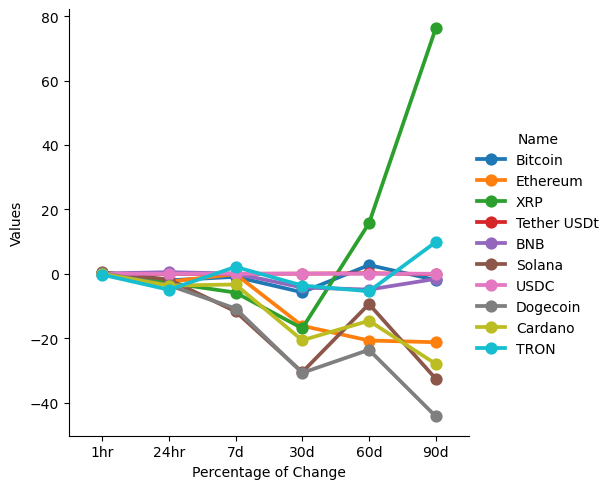

In [271]:
sns.catplot(x="Percentage of Change",y='Values',hue="Name",data=df7,kind='point')

<Axes: >

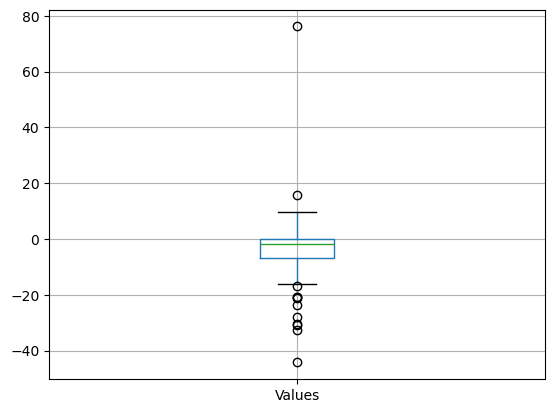

In [242]:
df7.boxplot()

In [285]:
df8=df[['name','quote.INR.price','timestamp']]
df8=df8.query("name=='Bitcoin'")
df8

,name,quote.INR.price,timestamp
0,Bitcoin,8355802.428961,2025-02-22 12:52:15.491576
10,Bitcoin,8355802.428961,2025-02-22 12:52:26.217683
20,Bitcoin,8355802.428961,2025-02-22 12:52:36.525882
30,Bitcoin,8355802.428961,2025-02-22 12:52:47.322676


<Axes: xlabel='timestamp', ylabel='quote.INR.price'>

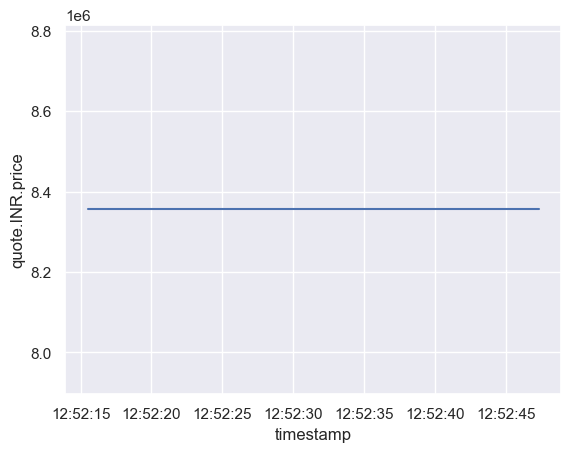

In [289]:
sns.set_theme(style="darkgrid")
sns.lineplot(x="timestamp",y="quote.INR.price",data=df8)